In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [219]:
# PART A
x_i_raw = np.genfromtxt('./ass1_data/linearX.csv', delimiter=',')
y_i = np.genfromtxt('./ass1_data/linearY.csv', delimiter=',')
theta = np.array([0.00, 0.00])
m = x_i_raw.size
n = 0.0195

# Normalize data
mean = 0
squared_sum = 0
for xi in x_i_raw:
    mean += xi
    squared_sum += xi*xi
mean = mean/m
e_x_squared = squared_sum/m
variance = e_x_squared - mean*mean

x_i_norm = np.array([(xi-mean)/variance for xi in x_i_raw])
x_i = np.array([[xi, 1] for xi in x_i_norm])
# print (x_i_norm)

In [220]:
# Detect Convergence
epsilon = 0.001
def converged(theta_next, theta):
    converged = True
    for d in range(theta.size):
        converged = converged and abs(theta_next[d] - theta[d]) < epsilon
    return converged

In [221]:
# Gradient Descent
num_iterations = 0
total_iterations = 10000
while(True):
    theta_next = np.array([0.00, 0.00])
    for j in range(theta.size):
        sum = 0
        for i in range(m):
            hyp = np.dot(theta, x_i[i])
            sum = sum + x_i[i][j]*(y_i[i] - hyp)
        theta_next[j] = theta[j] + n*sum
        
    if (converged(theta_next, theta)):
        break
        
    theta = theta_next
    num_iterations += 1
    
print (theta)
print (num_iterations)

[0.00230932 0.99611704]
148


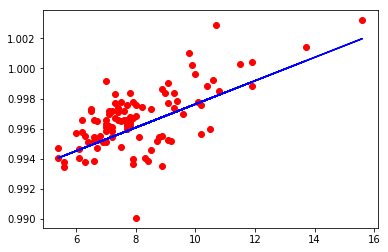

In [223]:
# Plot Graphs
h_theta = np.array([np.dot(theta, xi) for xi in x_i])
plt.plot(x_i_raw, y_i, 'ro')
plt.plot(x_i_raw, h_theta, 'b-')